<div align="center">
<a href="https://vbti.nl"><img src="images/vbti_logo.png" width="400"></a>
</div>

# Reinforcement Learning
This notebook supports the 'Reinforcement Learning' chapter of the [1-day masterclass "Deep Learning"](https://aiblog.nl/masterclass-deep-learning). It is not ment as a full course on deep learning, but rather gives you a flavor of the topic. For an in-depth AI training or consultancy please contact [VBTI](https://vbti.nl). 

Reinforcement Learning is an AI technique to learn an optimal sequence of actions. During the masterclass details of the action-value method, Q-learning, exploration/exploitation, discount factor and Deep Reinforcement Learning are explained. In this notebook you will build and train a RL agent that needs to optimize planning taxi trips.

<div align="center">
<a href="https://aiblog.nl/masterclass-deep-learning"><img src="images/rl.png" width="400"></a>
</div>

In [1]:
# import some default libaries
import numpy as np
import matplotlib.pyplot as plt

# Environment preparation
In this example the [gym tool](https://gym.openai.com) is used to create a simulation environment in which an agent needs to learn a task. The environment used is called 'Taxi-v2'. In this toy environment the agents needs to drive a taxi to pick up and drop passengers. 

> There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions. (['Taxi-v2'](https://gym.openai.com/envs/Taxi-v2/))

In [2]:
# import and create the simulation environment
import gym
env = gym.make("Taxi-v2")

print("Number of actions : {}".format(env.action_space))
print("Number of states  : {}".format(env.observation_space))

initial_state = env.reset()
print("Initial state     : {}".format(initial_state))

Number of actions : Discrete(6)
Number of states  : Discrete(500)
Initial state     : 223


In [3]:
# render environment
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



# Build Q-learning Agent
In the masterclass the Q-learning technique is explained. Following this methods, an agent learns to evaluate a state-action combination by using the following rule:

$$
Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \left[ R_{t+1} +\gamma \max\limits_{a} Q(s_{t+1},a) - Q(s_t,a_t) \right]
$$

The code below implements this rule.

In [4]:
from rl import Agent

class QLearningAgent(Agent):
    def __init__(self, n_states, n_actions, epsilon=0.1, gamma=0.9, alpha=0.1):
        Agent.__init__(self)
        
        self.n_states = n_states
        self.n_actions = n_actions

        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        
        self.learn = True
                
        self.reset()
        
    def reset(self):
        Agent.reset(self)                
        self.Q = np.zeros((self.n_states, self.n_actions))
                
    def get_action(self, state):
        # e-greedy
        if self.learn & (np.random.random()<self.epsilon): # explore
            a = np.random.randint(self.n_actions)
        else: # exploit
            a = np.argmax(self.Q[state,:])
        return a
    
    def update(self, state, action, next_state, reward):
        if self.learn:
            self.Q[state, action] = self.Q[state, action] + self.alpha * (reward + 
                                                                          self.gamma * np.max(self.Q[next_state,:]) -
                                                                          self.Q[state, action])
        Agent.update(self, state, action, next_state, reward)

In [5]:
# create a Q-learning agent
agent_Q = QLearningAgent(n_states=500, n_actions=6, epsilon=0.1, alpha=0.1, gamma=1.0)

# Train agent
To train a Q-learning agent it needs to try to drive the taxi many times. A maximum duration of 200 steps will be allowed to pick up and drop a passenger. 

First, let's see how well the agents performance without learning. The average performance over 10 experimens is calculated.

In [6]:
# calculate performance of agent
# Note: sometimes the agent does not move but the simulation does run. Be patient! ;)
from rl import run_experiment

agent_Q.learn = False
run_experiment(env, agent_Q, n_experiments=10, max_steps=200, render=True)
agent_Q.learn = True

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Average reward       : -200.0
Average #penalties   : 0.0
Average #steps       : 200.0
Average #reward/step : -1.0


Most likely, the agent will performance very bad (average reward: -200, average number of steps: 200). Therefore 20.000 experiments are carried out during which the agent learns to carry out its job at best.

Run experiment : 0 / 20000
Run experiment : 10000 / 20000
Done.

Average reward       : -1.6832
Average #penalties   : 0.6031
Average #steps       : 17.10515
Average #reward/step : 0.28073684369620894


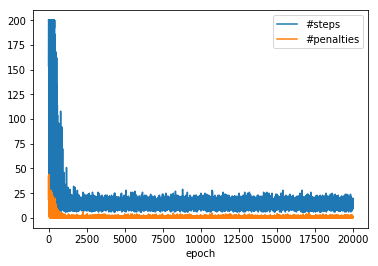

In [7]:
run_experiment(env, agent_Q, n_experiments=20_000, max_steps=200, render=False, n_epoch_update=10_000, plot_stats=True)

The average reward should have increased and the average number of steps should have decreased. We can now measure the performance of the agent after learning by averaging the performance over 10 experiments.

In [9]:
# calculate performance of agent
agent_Q.learn = False
run_experiment(env, agent_Q, n_experiments=10, max_steps=200, render=True, sleep=0.1)
agent_Q.learn = True

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Average reward       : 6.8
Average #penalties   : 0.0
Average #steps       : 14.2
Average #reward/step : 0.5125678733031674


# How to go further from here?
This notebook provides a basic processing pipeline for building a reinforcement learning agent that learns to carry out a job. Experiment a little bit yourself by changing the exploration parameter epsilon and discount factor gamma. Try to increase the reward or shorten the training time.